In [45]:
#Importing of necessary packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from googletrans import Translator
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import emoji

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [47]:
#Reading the cleaned tweets dataset
tweets = pd.read_csv("tweets_data.csv")

In [58]:
#detect html patterns
CLEANR = re.compile('<.*?>') 
#replace the new line characters
def process_text(text):
    txt_lst = text.split()
    
    #A helper function to process emojis
    #Emojis are left in in order to 
    def process_emoji(emo):
        try:
            decoded = emoji.demojize(emo)
            decoded = decoded.replace(":", "")
            return decoded
        except UnicodeDecodeError:
            #if unable to decode emoji, just keep a place holder for it
            return "__emoji__"
    
    #store all emojis as the decoded form
    txt_lst = [process_emoji(x) if emoji.is_emoji(x) else x for x in txt_lst]
    
    #process all tagged accounts
    def process_tagged_accounts(account):
        #replace all tagged accounts with __user_mention__
        if account.startswith("@") and len(account) > 1:
            return "__user_mention__"
        return account
    
    #replace hashtags with place holders
    def process_hashtags(text):
        if text.startswith("#"):
            return "__hashtag__"
        return text
    
    
    #apply the functions above
    txt_lst = [process_tagged_accounts(x) for x in txt_lst]
    txt_lst = [process_hashtags(x) for x in txt_lst]
    
    #next, we process the urls
    def process_urls_html(text):
        pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
        text = re.sub(pattern, "", text)
        text = re.sub(CLEANR, "", text)
        return text
    
    text = " ".join(txt_lst)
    
    final_text = process_urls_html(text)
    return final_text
        
    

        
    

In [60]:
tweets['text'] = tweets['text'].apply(process_text)

In [61]:
#Create a new dataframe for the wordcloud
lemmatizer = WordNetLemmatizer()
bot_tweets = tweets[tweets.isBot == 1][['text']].copy()
human_tweets = tweets[tweets.isBot == 0][['text']].copy()


In [62]:
#creating a stop word set
stop = set(stopwords.words('english'))
#tokenizing the text
bot_tweets['tokenized'] = bot_tweets.text.apply(word_tokenize)
contextual_stop = ['day','new','one', 'time','need']

In [63]:
bot_tweets['processed_data'] = bot_tweets.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                    and word not in contextual_stop])
bot_tweets['processed_data'] = bot_tweets.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [64]:
bot_tweets['sentence'] = bot_tweets['processed_data'].apply(lambda x:' '.join(x))

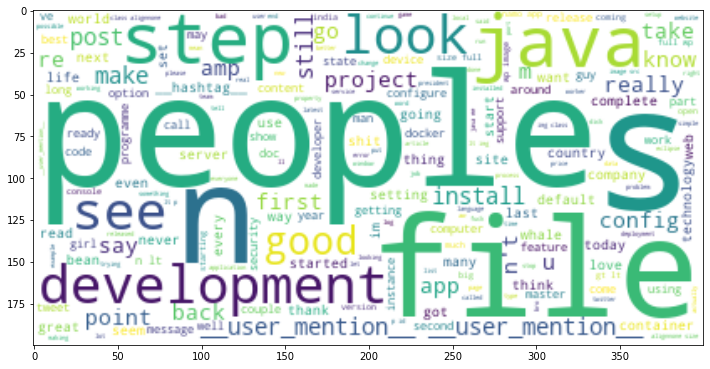

In [65]:
#Word cloud for bots
big_sentence = ''

for sentence in bot_tweets['sentence']:
    
    big_sentence += sentence


wordcloud = WordCloud(background_color='white').generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

In [66]:
#Similarly, let us create a wordcloud for humans
human_tweets['tokenized'] = human_tweets.text.apply(word_tokenize)


In [67]:
human_tweets['processed_data'] = human_tweets.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word not in contextual_stop])
human_tweets['processed_data'] = human_tweets.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [68]:
human_tweets['sentence'] = human_tweets['processed_data'].apply(lambda x:' '.join(x))

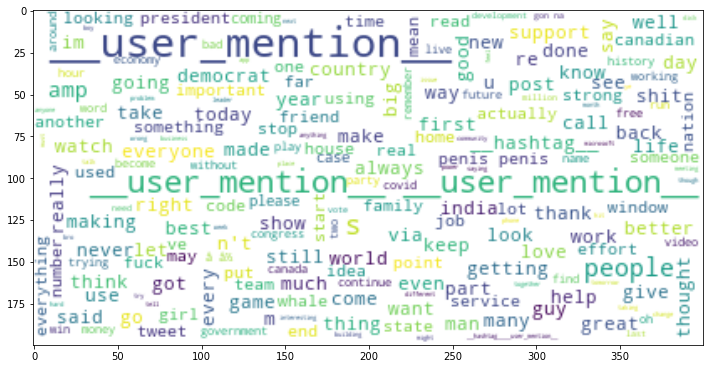

In [69]:
big_sentence = ''

for sentence in human_tweets['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')